In [ ]:
#Entrega 8 Enric Sena Alvarez

In [153]:
#Carrego els paquets necessaris:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kneed
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [56]:
#Carrego el dataset:
data=pd.read_csv('Data.csv')
data.head(25)
data.describe()
data=data.drop(columns=['Column1','Column2','Column3','Column4'])


In [125]:
#Exercici 1: Clasifica els registres amb KMEANS
#Escalo les dades per a poder treballar:
sc=StandardScaler()
num_d=data.select_dtypes(exclude=['object'])
data[num_d.columns]=sc.fit_transform(num_d)
data.head(5)
X=data.iloc[:,3:-1]
X.head(5)
X=X.to_numpy()
Y=data.iloc[:,1]
Y.head(5)

0    video
1    photo
2    video
3    photo
4    photo
Name: status_type, dtype: object

In [129]:
Y2=pd.get_dummies(Y)
Y2.head(10)
Y2=Y2.drop(columns=['link','photo','status'])
Y2.columns# em quedo només amb la resposta VIDEO.

Index(['video'], dtype='object')

In [103]:
#Procedeixo a fer el k-means:
#Poso que vull que m'ho classifiqui en 2 grups per diferenciar entre video o photo.

kmeans=KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

In [109]:
kmeans.labels_[:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#Exercici 2: Classifica els diferents registres utilitzant clustering jeràrquic.

In [142]:
#Carrego els paquets:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


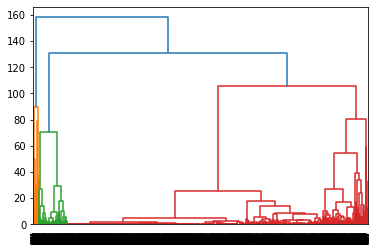

In [141]:
dendogram=sch.dendrogram(sch.linkage(X,method='ward'))

In [147]:
#Estableixo que el nombre idoni de clusters és 2 ja que volem classificar entre video o foto:
model=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
model.fit(X)
labels=model.labels_

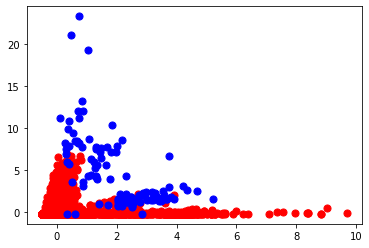

In [148]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
#Veiem que el model podria ser un tant millor i potser aplicant alguna técnica d'aprenentatge supervisat com per exemple un QDA potser conseguiriem discriminar millor tot i que cal tenir en compte que les dimensions del nostre dataser són superiors a 2 i per tant només estem veient una perspectiva de les moltes possibles on potser si que la separació es veu millor.
#Podriem aplicar alguna técnica de reducció de la dimensió tal com PCA o analisi factorial per tal de millorar la classificació.

In [155]:
silhouette_cluster1=silhouette_score(X,labels)
silhouette_cluster1
#Hem obtingut un silhouette score prou bo per classificar en 2 grups les nostres dades (entre foto i video) ja que esta prop d'1 que és el valor màxim i alhora lluny de zero que significaria que hi ha "overlapping" entre clusters.

0.8600815982295198